In [2]:
import os
import csv
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def is_number(s):
    """ Returns True if string is a number. """
    try:
        float(s)
        return True
    except ValueError:
        return False

In [10]:
selected_dir = "../benchmarking_results/best_results"
selected_accuracy = "1.0e-4"

result_summary_files = []

# Search for the available json files in the results folder:
for subdir, dirs, files in os.walk(selected_dir):
    for file in files:
        if file.endswith(".csv") and selected_accuracy in file:
            result_summary_files.append(os.path.join(subdir, file))
    break # <-- This ensures that we only search in a depth of one.
result_summary_files.sort()
for file in result_summary_files:
    print(file.split("/")[-1])


lp_benchmark_1.0e-4_PDLP+Nesterov_scaling=0.3_threshold=0.8_similarity_scaling=true.csv
lp_benchmark_1.0e-4_PDLP+Nesterov_scaling=0.3_threshold=0.9_similarity_scaling=false.csv
lp_benchmark_1.0e-4_PDLP_polish=true.csv
mip_relaxations_1.0e-4_PDLP+Nesterov_scaling=0.3_threshold=0.8_similarity_scaling=true.csv
mip_relaxations_1.0e-4_PDLP+Nesterov_scaling=0.3_threshold=0.9_similarity_scaling=false.csv
mip_relaxations_1.0e-4_PDLP_polish=true.csv
netlib_benchmark_1.0e-4_PDLP+Nesterov_scaling=0.3_threshold=0.8_similarity_scaling=true.csv
netlib_benchmark_1.0e-4_PDLP+Nesterov_scaling=0.3_threshold=0.9_similarity_scaling=false.csv
netlib_benchmark_1.0e-4_PDLP_polish=true.csv


In [11]:
# A dictionary containing the information for the plots:
plot_dict = {}

# Data for x-axis in plots: 
similarity_threshold_list = []
kappa_value_list = []
lambda_value_list = []

# Data for y-axis in plots: 
total_iterations_list = []
solved_instances_list = []

for file in result_summary_files:
    total_iterations = 0
    total_seconds = 0
    total_KKT_passes = 0
    instance_counter = 0
    solved_instances = 0
    kkt_sgm_10 = 1

    file_key = file.split("/")[-1].removesuffix(".csv")
    inner_file_dict = {}

    kkt_passes_array = []
    problems_solved_array = []

    similarity_threshold = file.split("threshold=")[-1].removesuffix(".csv")
    kappa=file.split("kappa=")[-1].split("_")[0]
    lambda_val=file.split("lambda=")[-1].split("_")[0]
    if not is_number(kappa):
        kappa = 0 
    if not is_number(lambda_val):
        lambda_val = 0
    if not is_number(similarity_threshold):
        similarity_threshold = "1.0"
    
    with open(file, "r") as csv_file:
        file_reader = csv.reader(csv_file)
        
        for line in file_reader:
            instance_counter += 1
        instance_counter -= 1
  
    with open(file, "r") as csv_file:
        file_reader = csv.reader(csv_file)
        
        first_row = True
        for line in file_reader: 
            if first_row:
                first_row = False
            else:
                termination_reason = line[1].strip()
                if termination_reason == "TERMINATION_REASON_OPTIMAL":
                    solved_instances += 1
                if termination_reason == "TEMINATION_REASON_ITERATION_LIMIT":
                    kkt_passes = 100000
                else:
                    kkt_passes = float(line[4].strip())
                total_iterations += int(line[2].strip())
                total_seconds += float(line[3].strip())
                total_KKT_passes += kkt_passes
                
                kkt_sgm_10 *= (kkt_passes + 10)**(1/instance_counter)

                # Saving the information for plotting: 
                kkt_passes_array.append(total_KKT_passes)
                problems_solved_array.append(solved_instances/instance_counter)

    # Putting the plotting information in the correct place in the dictionaries:
    inner_file_dict["kkt_passes"] = kkt_passes_array
    inner_file_dict["problems_solved"] = problems_solved_array
    plot_dict[file_key] = inner_file_dict

    kkt_sgm_10 = (kkt_sgm_10) - 10
    
    print(file.split("/")[-1])    
    # print(" - Total iterations: ", total_iterations) 
    print(" - Number of instances solved: ", solved_instances, "/", instance_counter) 
    # print(" - Total seconds: ", total_seconds)
    print(" - Total KKT passes: ", total_KKT_passes)
    print(" - SGM10 KKT passes: ", kkt_sgm_10)
    # Saving the stats for a comparison plot:
    similarity_threshold_list.append(float(similarity_threshold))
    kappa_value_list.append(float(kappa))
    lambda_value_list.append(float(lambda_val))
    total_iterations_list.append(int(total_iterations))
    solved_instances_list.append(solved_instances)

lp_benchmark_1.0e-4_PDLP+Nesterov_scaling=0.3_threshold=0.8_similarity_scaling=true.csv
 - Number of instances solved:  41 / 51
 - Total KKT passes:  1454050.0
 - SGM10 KKT passes:  3407.7818404971777
lp_benchmark_1.0e-4_PDLP+Nesterov_scaling=0.3_threshold=0.9_similarity_scaling=false.csv
 - Number of instances solved:  44 / 51
 - Total KKT passes:  1426045.0
 - SGM10 KKT passes:  3630.510565729608
lp_benchmark_1.0e-4_PDLP_polish=true.csv
 - Number of instances solved:  41 / 51
 - Total KKT passes:  1567669.0
 - SGM10 KKT passes:  3753.7936359087116
mip_relaxations_1.0e-4_PDLP+Nesterov_scaling=0.3_threshold=0.8_similarity_scaling=true.csv
 - Number of instances solved:  337 / 378
 - Total KKT passes:  6146823.0
 - SGM10 KKT passes:  2165.3330654391707
mip_relaxations_1.0e-4_PDLP+Nesterov_scaling=0.3_threshold=0.9_similarity_scaling=false.csv
 - Number of instances solved:  338 / 378
 - Total KKT passes:  6268259.0
 - SGM10 KKT passes:  2163.325529904456
mip_relaxations_1.0e-4_PDLP_poli

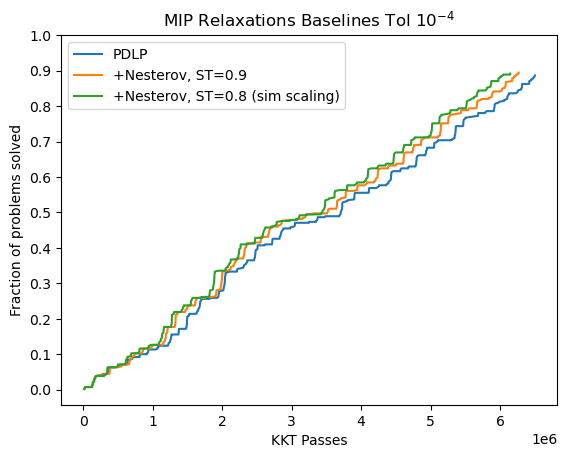

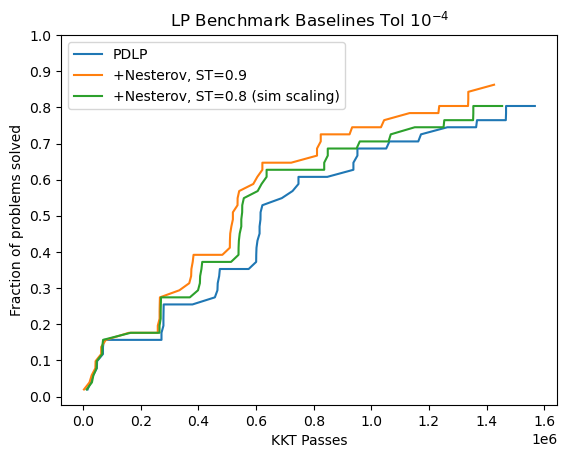

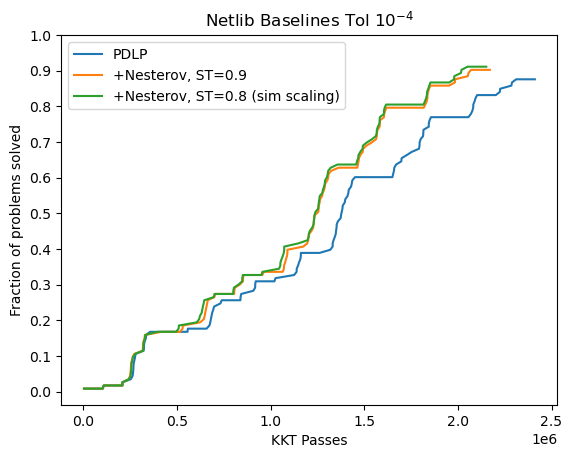

In [7]:
# Extracting and plotting the information from the plotting dict:

mip_relaxations_PDLP = plot_dict["mip_relaxations_1.0e-4_PDLP_polish=true"]
mip_relaxations_Nesterov_09 = plot_dict["mip_relaxations_1.0e-4_PDLP+Nesterov_scaling=0.3_threshold=0.9_similarity_scaling=false"]
mip_relaxations_Nesterov_08 = plot_dict["mip_relaxations_1.0e-4_PDLP+Nesterov_scaling=0.3_threshold=0.8_similarity_scaling=true"]

lp_benchmark_PDLP = plot_dict["lp_benchmark_1.0e-4_PDLP_polish=true"]
lp_benchmark_Nesterov_09 = plot_dict["lp_benchmark_1.0e-4_PDLP+Nesterov_scaling=0.3_threshold=0.9_similarity_scaling=false"]
lp_benchmark_Nesterov_08 = plot_dict["lp_benchmark_1.0e-4_PDLP+Nesterov_scaling=0.3_threshold=0.8_similarity_scaling=true"]

netlib_PDLP = plot_dict["netlib_benchmark_1.0e-4_PDLP_polish=true"]
netlib_Nesterov_09 = plot_dict["netlib_benchmark_1.0e-4_PDLP+Nesterov_scaling=0.3_threshold=0.9_similarity_scaling=false"]
netlib_Nesterov_08 = plot_dict["netlib_benchmark_1.0e-4_PDLP+Nesterov_scaling=0.3_threshold=0.8_similarity_scaling=true"]

### Plotting the MIP relaxations results: 
plt.figure()
plt.plot(mip_relaxations_PDLP["kkt_passes"], mip_relaxations_PDLP["problems_solved"], label="PDLP")
plt.plot(mip_relaxations_Nesterov_09["kkt_passes"], mip_relaxations_Nesterov_09["problems_solved"], label="+Nesterov, ST=0.9")
plt.plot(mip_relaxations_Nesterov_08["kkt_passes"], mip_relaxations_Nesterov_08["problems_solved"], label="+Nesterov, ST=0.8 (sim scaling)")
plt.legend()
plt.title("MIP Relaxations Baselines Tol $10^{-4}$")
plt.ylabel("Fraction of problems solved")
plt.xlabel("KKT Passes")
plt.yticks(np.arange(-0,1.1,0.1));

### Plotting the LP benchmark results: 
plt.figure()
plt.plot(lp_benchmark_PDLP["kkt_passes"], lp_benchmark_PDLP["problems_solved"], label="PDLP")
plt.plot(lp_benchmark_Nesterov_09["kkt_passes"], lp_benchmark_Nesterov_09["problems_solved"], label="+Nesterov, ST=0.9")
plt.plot(lp_benchmark_Nesterov_08["kkt_passes"], lp_benchmark_Nesterov_08["problems_solved"], label="+Nesterov, ST=0.8 (sim scaling)")
plt.legend()
plt.title("LP Benchmark Baselines Tol $10^{-4}$")
plt.ylabel("Fraction of problems solved")
plt.xlabel("KKT Passes")
plt.yticks(np.arange(-0,1.1,0.1));

### Plotting the Netlib benchmark results:
plt.figure()
plt.plot(netlib_PDLP["kkt_passes"], netlib_PDLP["problems_solved"], label="PDLP")
plt.plot(netlib_Nesterov_09["kkt_passes"], netlib_Nesterov_09["problems_solved"], label="+Nesterov, ST=0.9")
plt.plot(netlib_Nesterov_08["kkt_passes"], netlib_Nesterov_08["problems_solved"], label="+Nesterov, ST=0.8 (sim scaling)")
plt.legend()
plt.title("Netlib Baselines Tol $10^{-4}$")
plt.ylabel("Fraction of problems solved")
plt.xlabel("KKT Passes")
plt.yticks(np.arange(-0,1.1,0.1));

